In [1]:
import numpy as np
import pandas as pd
import requests
from rates_processing import calc_discount
from cds_processing import calc_cds_monthly

In [2]:
start_date = '2001-01-02'
end_date = '2024-01-31'
loss_given_default =0.6

quarterly_discount = calc_discount(start_date, end_date)
cds_spread_mean = calc_cds_monthly('mean')

/Users/Nidhi/Documents/GitHub/P15_DANK/src/interest_rates.py:65: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  processed_df.index = pd.to_datetime(processed_df.index)


WRDS recommends setting up a .pgpass file.
Created .pgpass file successfully.
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done


In [53]:
lambda_df = 4 * np.log(1+(cds_spread_mean/(4*loss_given_default)))
quarters = range(1, 21)  # 1 to 20 quarters

risky_duration = pd.DataFrame(index=lambda_df.index, columns=lambda_df.columns)
for col in lambda_df.columns:
    quarterly_survival_probability = pd.DataFrame(index=lambda_df.index, columns=quarters)
    for quarter in quarters:
        quarterly_survival_probability[quarter] = np.exp(-((quarter * lambda_df[col]) / 4))
    temp_df = quarterly_survival_probability * quarterly_discount
    risky_duration[col] = 0.25 * temp_df.sum(axis=1)

In [54]:
risky_duration_shifted = risky_duration.shift(1)
cds_spread_mean_shifted = cds_spread_mean.shift(1)
cds_spread_change = cds_spread_mean.diff()

In [70]:
cds_return = ((cds_spread_mean_shifted/12) + (cds_spread_change * risky_duration_shifted))

In [71]:
cds_return*100

,cds_1,cds_2,cds_3,cds_4,cds_5,cds_6,cds_7,cds_8,cds_9,cds_10,cds_11,cds_12,cds_13,cds_14,cds_15,cds_16,cds_17,cds_18,cds_19,cds_20
Date,,,,,,,,,,,,,,,,,,,,
2001-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-02-28,0.019918,0.025953,0.033057,0.036519,0.042865,0.047973,0.051288,0.057412,0.065189,0.072890,0.081650,0.089367,0.098756,0.123652,0.134328,0.145087,0.158550,0.208913,0.318168,0.940310
2001-03-31,0.019948,0.026568,0.031070,0.034122,0.038689,0.044606,0.051246,0.058597,0.064745,0.068504,0.074105,0.080902,0.089752,0.097171,0.119489,0.139711,0.154201,0.183002,0.240901,0.662733
2001-04-30,0.020004,0.026523,0.030997,0.034388,0.037719,0.041426,0.047622,0.059559,0.063903,0.068298,0.074490,0.079263,0.086644,0.114198,0.124251,0.146707,0.189862,0.232763,0.298159,0.692145
2001-05-31,0.018450,0.024077,0.027573,0.031423,0.035596,0.039717,0.047013,0.050614,0.056324,0.060788,0.064970,0.075139,0.089169,0.095770,0.112493,0.139119,0.157646,0.202272,0.253145,0.465762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31,0.015032,0.023538,0.030924,0.035576,0.039881,0.044716,0.051174,0.056634,0.062513,0.068478,0.075208,0.083213,0.096907,0.115775,0.138652,0.164918,0.203952,0.260958,0.373124,1.538730
2023-09-30,0.015517,0.025274,0.032365,0.037806,0.042633,0.048104,0.053666,0.060418,0.066508,0.073352,0.080986,0.088450,0.100116,0.124341,0.148227,0.176323,0.217463,0.282420,0.398984,1.676356
2023-10-31,0.015456,0.026341,0.033705,0.038983,0.044489,0.049883,0.055233,0.061759,0.068926,0.076419,0.084437,0.091912,0.103081,0.126935,0.152938,0.179550,0.222276,0.293441,0.415817,2.046441


In [50]:
actual_return = pd.read_csv('/Users/Nidhi/Downloads/He_Kelly_Manela_Factors_And_Test_Assets_monthly.csv')


In [51]:
actual_return = actual_return[['yyyymm','CDS_01','CDS_02','CDS_03','CDS_04','CDS_05','CDS_06','CDS_07','CDS_08','CDS_09','CDS_10','CDS_11','CDS_12','CDS_13','CDS_14','CDS_15','CDS_16','CDS_17','CDS_18','CDS_19','CDS_20']]

In [52]:
actual_return = actual_return.dropna(axis=0)
actual_return*100

,yyyymm,CDS_01,CDS_02,CDS_03,CDS_04,CDS_05,CDS_06,CDS_07,CDS_08,CDS_09,...,CDS_11,CDS_12,CDS_13,CDS_14,CDS_15,CDS_16,CDS_17,CDS_18,CDS_19,CDS_20
373,20010200.0,0.39,0.40,0.33,0.24,0.93,0.30,0.20,0.48,0.44,...,0.78,-0.36,0.42,0.57,0.27,-1.53,-0.32,0.70,0.05,1.93
374,20010300.0,0.12,0.41,0.61,0.45,0.73,0.59,0.79,0.71,0.87,...,0.60,0.42,0.32,0.68,-0.12,0.93,0.83,-0.12,0.72,2.19
375,20010400.0,0.33,0.44,0.44,0.60,0.54,0.37,0.44,0.44,0.68,...,0.98,1.06,0.84,0.98,0.83,1.24,0.61,1.09,0.41,-0.18
376,20010500.0,0.38,0.43,0.45,0.39,0.44,0.39,0.40,0.75,0.45,...,0.76,0.78,0.49,1.17,1.08,0.61,1.50,1.52,1.84,1.40
377,20010600.0,0.30,0.27,0.44,0.37,0.79,0.42,0.53,0.35,0.40,...,0.31,0.29,0.38,0.45,0.34,0.44,0.20,0.73,0.65,-0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,20120800.0,0.05,0.09,0.13,0.11,0.22,0.22,0.24,0.17,0.15,...,0.31,0.15,0.35,0.32,0.43,0.62,0.84,0.60,0.51,1.52
512,20120900.0,0.12,0.10,0.20,0.22,0.30,0.23,0.30,0.33,0.39,...,0.49,0.59,0.57,0.87,0.70,0.83,0.92,1.20,1.19,1.74
513,20121000.0,0.10,0.09,0.09,0.16,0.18,0.19,0.14,0.10,0.19,...,0.08,0.28,0.43,0.42,0.13,0.45,0.33,0.28,-0.10,0.45
514,20121100.0,-0.06,-0.07,-0.09,-0.07,-0.10,-0.10,-0.09,-0.16,-0.16,...,-0.37,-0.05,-0.12,0.05,0.15,-0.02,0.26,0.27,1.07,0.15


<Axes: xlabel='Date'>

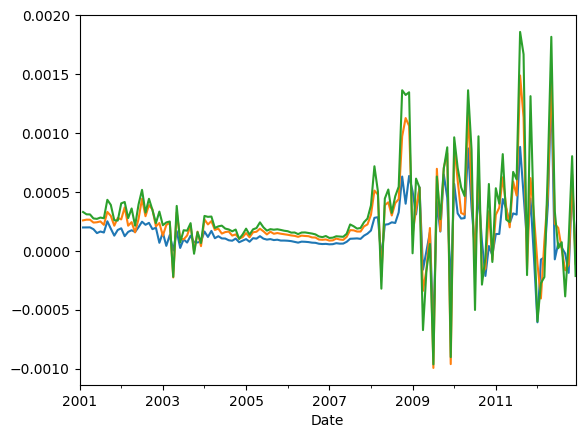

In [72]:
cds_return_paper = cds_return[cds_return.index <= '2012-12-31']
cds_return_paper['cds_1'].plot()
cds_return_paper['cds_2'].plot()
cds_return_paper['cds_3'].plot()

<Axes: >

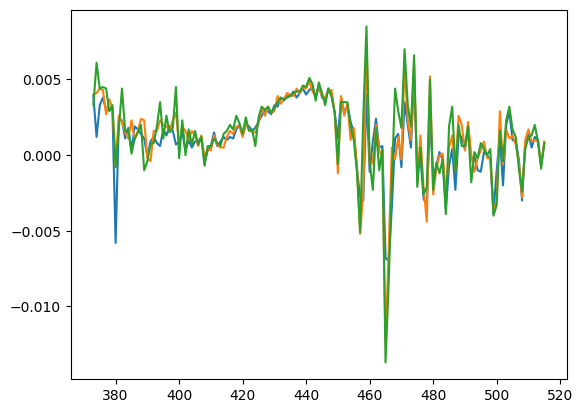

In [65]:
actual_return['CDS_01'].plot()
actual_return['CDS_02'].plot()
actual_return['CDS_03'].plot()